The ODE for the Hopf bifurcation normal form:

\begin{align} 
\frac{du_1}{dt} = \beta u_1 - u_2 + \sigma u_1 ( u_1^2 + u_2^2 ) \\
\frac{du_2}{dt} = u_1 + \beta u_2 + \sigma u_2 ( u_1^2 + u_2^2 )

\end{align}

which for σ=−1 (a supercritical Hopf bifurcation)

beta = 0.001, T = 6.283185307702945
beta = 0.01, T = 6.283185307708604
beta = 0.1, T = 6.283185307935534
beta = 0.5, T = 6.283185307387341
beta = 2, T = 6.28318530769667
beta = 5, T = 6.283185307701177
beta = 10, T = 6.2831853076942865
beta = 20, T = 6.28318530765924


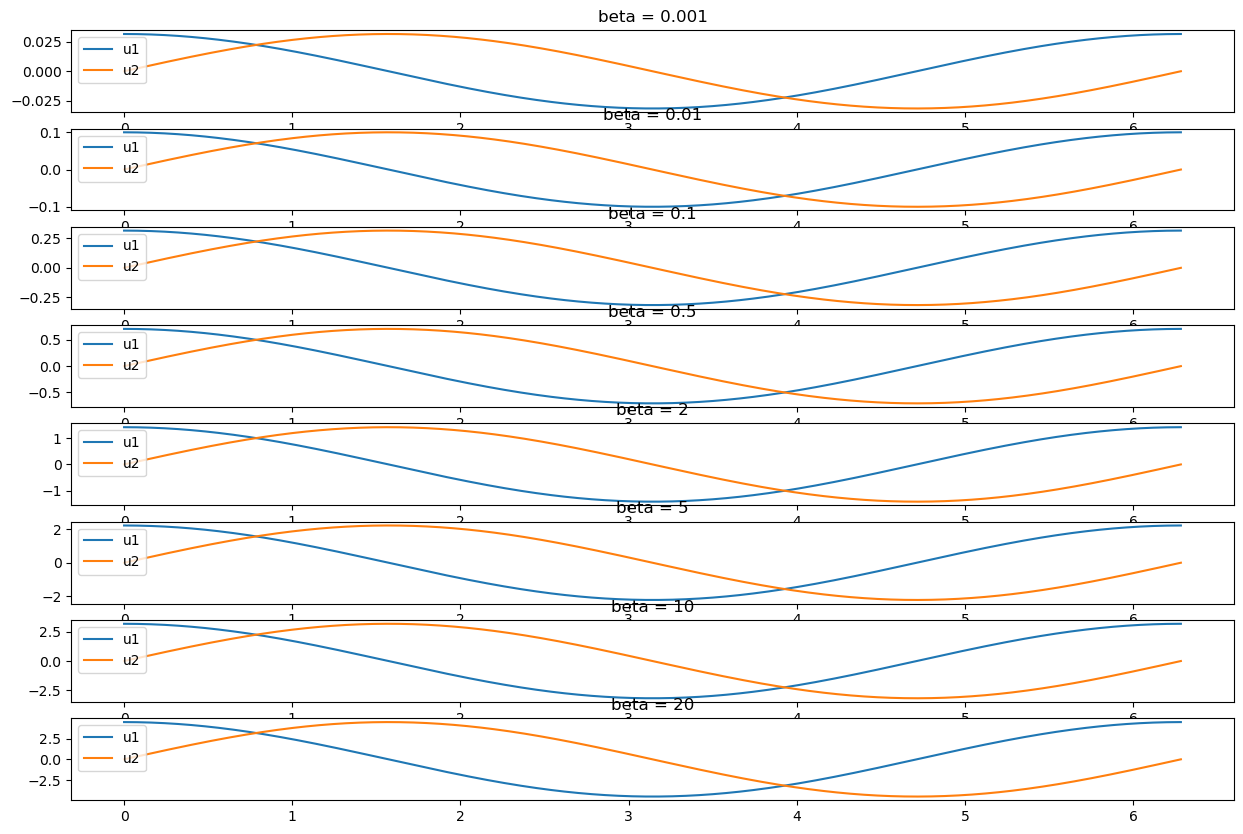

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from SciComp.solvers import solve_to, shooting

def ODE(t, y, beta, sigma):
    u1 = y[0]
    u2 = y[1]
    du1dt = beta*u1 - u2 + sigma*u1*(u1**2 + u2**2)
    du2dt = u1 + beta*u2 + sigma*u2*(u1**2 + u2**2)
    return np.array([du1dt, du2dt])

def phase_function(t, y, beta, sigma):
    return ODE(t, y, beta, sigma)[0]

t0 = 0
tf = 30
y0 = np.array([1, 1])
sigma = -1
betas = [0.001, 0.01, 0.1, 0.5, 2, 5, 10, 20]
# betas = np.linspace(-2 , 2, 11)

solutions = []
t_solutions = []

for beta in betas:
    args = (beta, sigma)
    u0 = np.array([1, 0, 7])
    X0, T = shooting(u0, ODE, phase_function, function_args=args)
    print('beta = {}, T = {}'.format(beta, T))
    t, y = solve_to(ODE, t0, X0, tf=T, method='RK4', args=args)
    solutions.append(y)
    t_solutions.append(t)

fig, ax = plt.subplots(len(betas), 1, figsize=(15, 10))

for i in range(len(betas)):
    ax[i].plot(t_solutions[i], solutions[i][:, 0], label='u1')
    ax[i].plot(t_solutions[i], solutions[i][:, 1], label='u2')
    ax[i].set_title('beta = {}'.format(betas[i]))
    ax[i].legend()

plt.show()

X0 = [1.41421356e+00 8.87890726e-09], T = 6.28318530770306
x_end = 1.4142135601542642, y_end = 8.879644837998801e-09
x_start = 1.4142135601537529, y_start = 8.878907264610786e-09
Magnitude of x_end = 1.4142135601542642
Sqrt of 2 = 1.4142135623730951


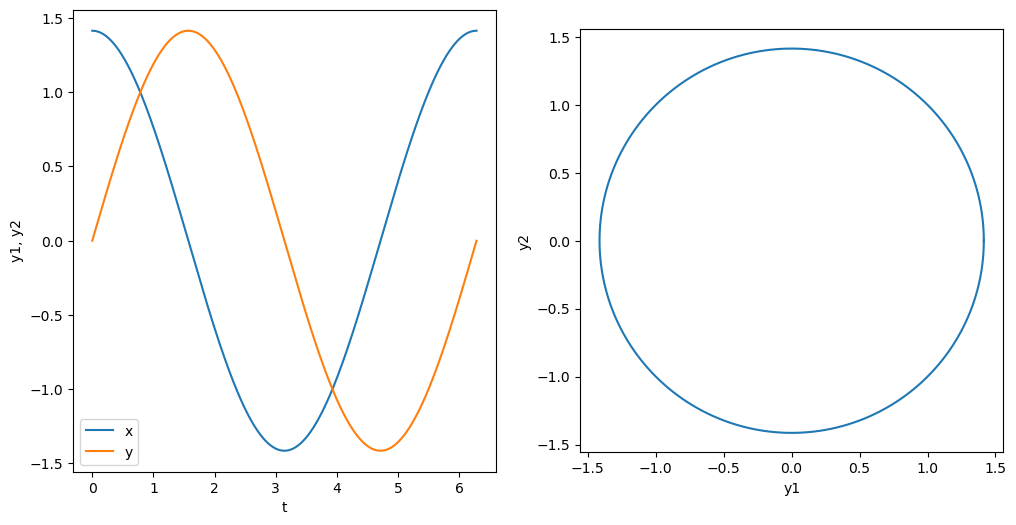

In [16]:
from SciComp.plotting import plot_phase_plane_2D

def ODE(t, y, beta, sigma):
    u1 = y[0]
    u2 = y[1]
    du1dt = beta*u1 - u2 + sigma*u1*(u1**2 + u2**2)
    du2dt = u1 + beta*u2 + sigma*u2*(u1**2 + u2**2)
    return np.array([du1dt, du2dt])

def phase_function(t, y, beta, sigma):
    return ODE(t, y, beta, sigma)[0]

args = (2, -1)
u0 = np.array([1, 1, 7])

X0, T = shooting(u0, ODE, phase_function, function_args=args)
t, y = solve_to(ODE, 0, X0, tf=T, method='RK4', args=args)

print('X0 = {}, T = {}'.format(X0, T))
print('x_end = {}, y_end = {}'.format(y[-1, 0], y[-1, 1]))
print('x_start = {}, y_start = {}'.format(y[0, 0], y[0, 1]))

print('Magnitude of x_end = {}'.format(np.sqrt(y[-1, 0]**2 + y[-1, 1]**2)))
print('Sqrt of 2 = {}'.format(np.sqrt(2)))
plot_phase_plane_2D(t, y)
# Print 

\begin{align}
u_1(t) = \sqrt{\beta \cos (t + \theta)} \\
u_2(t) = \sqrt{\beta \sin (t + \theta)}
\end{align}

where $\theta$ the phase shift.


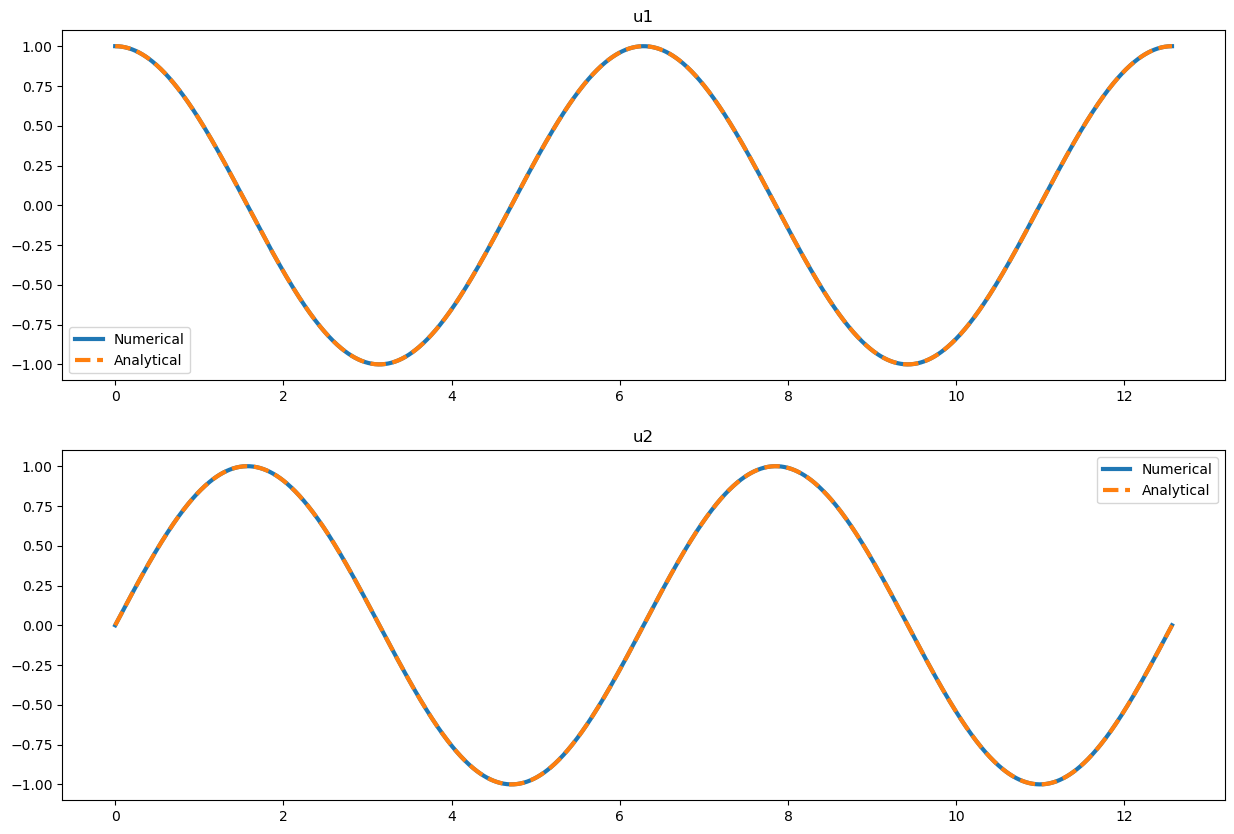

In [13]:

import numpy as np
import matplotlib.pyplot as plt

theta = T
t, y = solve_to(ODE, 0, X0, tf=T*2, method='RK4')

u1_a = np.sqrt(beta)*np.cos(t + theta)
u2_a = np.sqrt(beta)*np.sin(t + theta)

u1_num = y[:, 0]
u2_num = y[:, 1]

# Plot the solutions for u1 and u2
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

ax[0].plot(t, u1_num, '-', label='Numerical', linewidth=3)
ax[0].plot(t, u1_a, '--', label='Analytical', linewidth=3)
ax[0].set_title('u1')
ax[0].legend()

ax[1].plot(t, u2_num, '-', label='Numerical', linewidth=3)
ax[1].plot(t, u2_a, '--', label='Analytical', linewidth=3)
ax[1].set_title('u2')
ax[1].legend()

plt.show()